In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings
from scipy import stats
from scipy.stats import fisher_exact
from scipy.stats import f_oneway
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Importation de notre Dataframe
df= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
#Affichage de notre Dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Supprimer la catégorie "Other" du DataFrame
df = df[df['gender'] != 'Other']
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [5]:
#Affichage des variables categorielles
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [6]:
#Noms de colonnes avec le nombre de valeurs quantitatives ou qualitatives(si sup à 3 c'est Quantitativ sinon Qualitativ)
liste_colonnes=df.columns
print(liste_colonnes)
df.nunique()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


id                   5109
gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [7]:
# Nomination des variables qualitatives et quantitatives
variables_quantitatives= ['age', 'avg_glucose_level', 'bmi']
variables_qualitatives= ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke']

In [8]:
# Affichage des colonnes object
total_df = df.describe(include='object')
total_df

,gender,ever_married,work_type,Residence_type,smoking_status
count,5109,5109,5109,5109,5109
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2924,2596,1892


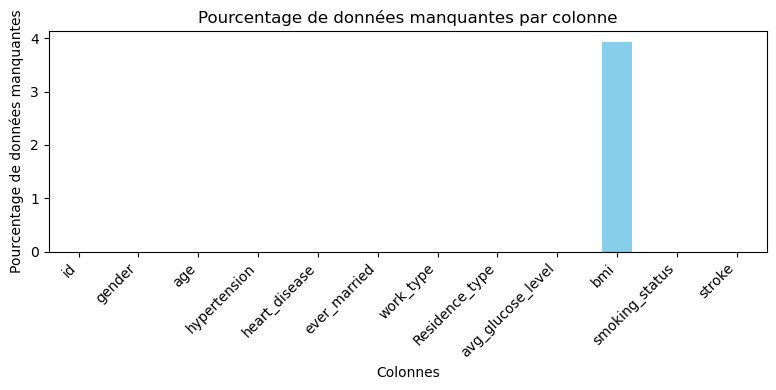

In [9]:
# Calculer le pourcentage de données manquantes par colonne
pourcentage_manquant_par_colonne = (df.isnull().sum() / len(df)) * 100

# Créer le graphique à barres
plt.figure(figsize=(8, 4))
pourcentage_manquant_par_colonne.plot(kind='bar', color='skyblue')
plt.title('Pourcentage de données manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage de données manquantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# Affichage de colonnes avec de données numériques
total_df = df.describe()
total_df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


* **id** : identifiant unique.  
* **gender** : genre du patient.  
* **age** : âge du patient.  
* **hypertension** : 0 si le patient n'a pas d'hypertension, 1 si le patient a de l'hypertension.  
* **heart_disease** : 0 si le patient n'a pas de maladie cardiaque, 1 si le patient a une maladie cardiaque.  
* **ever_married** : si le patient a déjà été marié ou pas.  
* **work_type** : type de travail du patient.  
* **Residence_type** : type de résidence du patient *"Rural"* ou *"Urbain"*.  
* **avg_glucose_level** : taux moyen de glucose dans le sang.  
* **bmi** : indice de masse corporelle.  
* **smoking_status** : *"a déjà fumé"*, *"n'a jamais fumé"*, *"fumé"* ou *"Inconnu"*.  
* **stroke** : 1 si le patient a eu un accident vasculaire cérébral ou 0 s'il n'en a pas eu.  

# Analyse univariée pour les variables quantitatives :

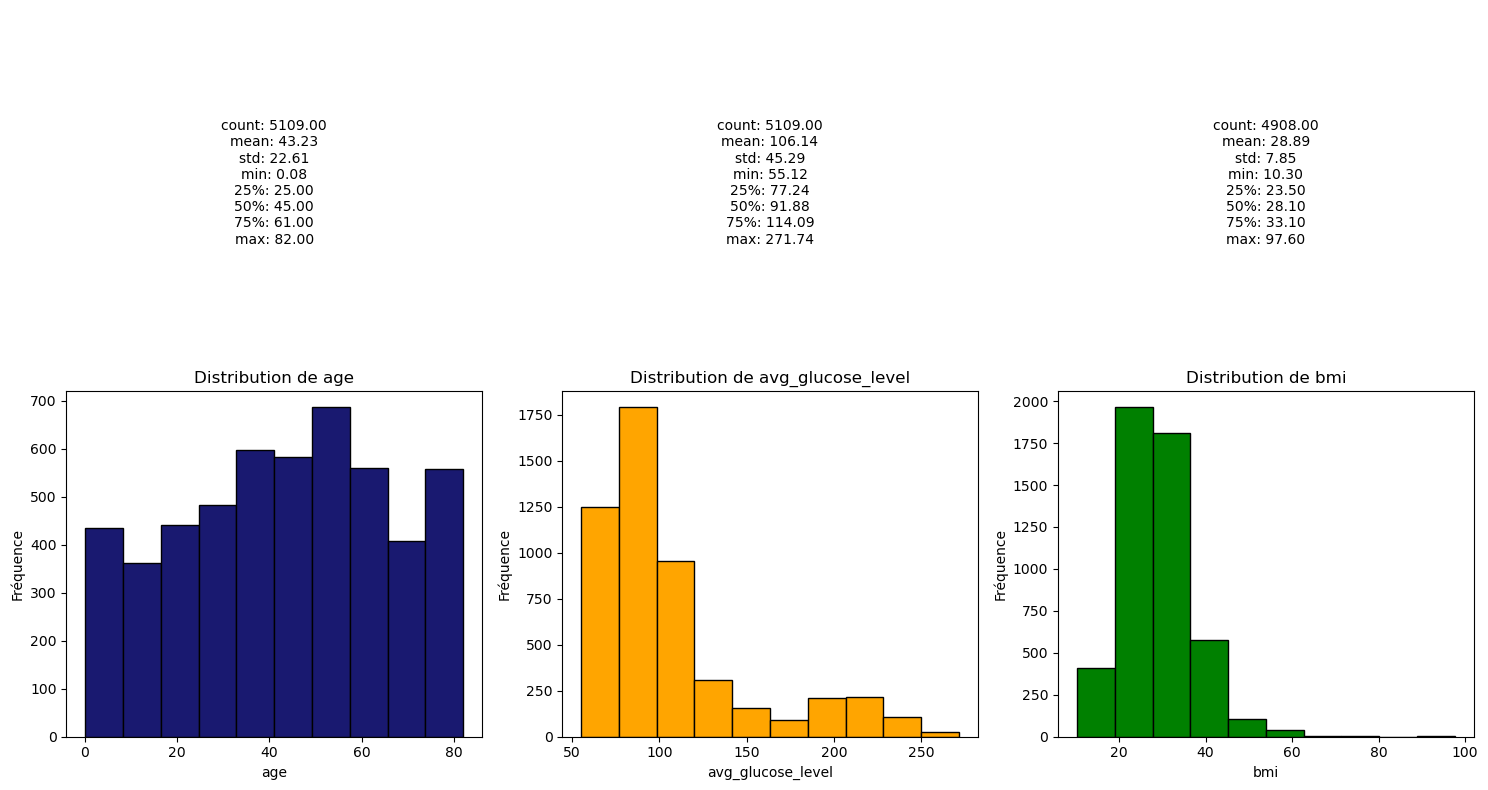

In [11]:
# Liste des variables quantitatives (Graph à barres)
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(2, len(variables_quantitatives), figsize=(15, 8))

# Boucle pour générer les graphiques pour chaque variable + histogrammes
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):

    axes[1, i].hist(df[variable], bins=10, color=color, edgecolor='black')
    axes[1, i].set_title(f'Distribution de {variable}')
    axes[1, i].set_xlabel(variable)
    axes[1, i].set_ylabel('Fréquence')

# Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])

# Ajout des statistiques descriptives au-dessus du leur graphique
    axes[0, i].text(0.5, 0.5, stats_text, fontsize=10, ha='center', va='center', transform=axes[0, i].transAxes)
    axes[0, i].axis('off')
    
plt.tight_layout()
plt.show()

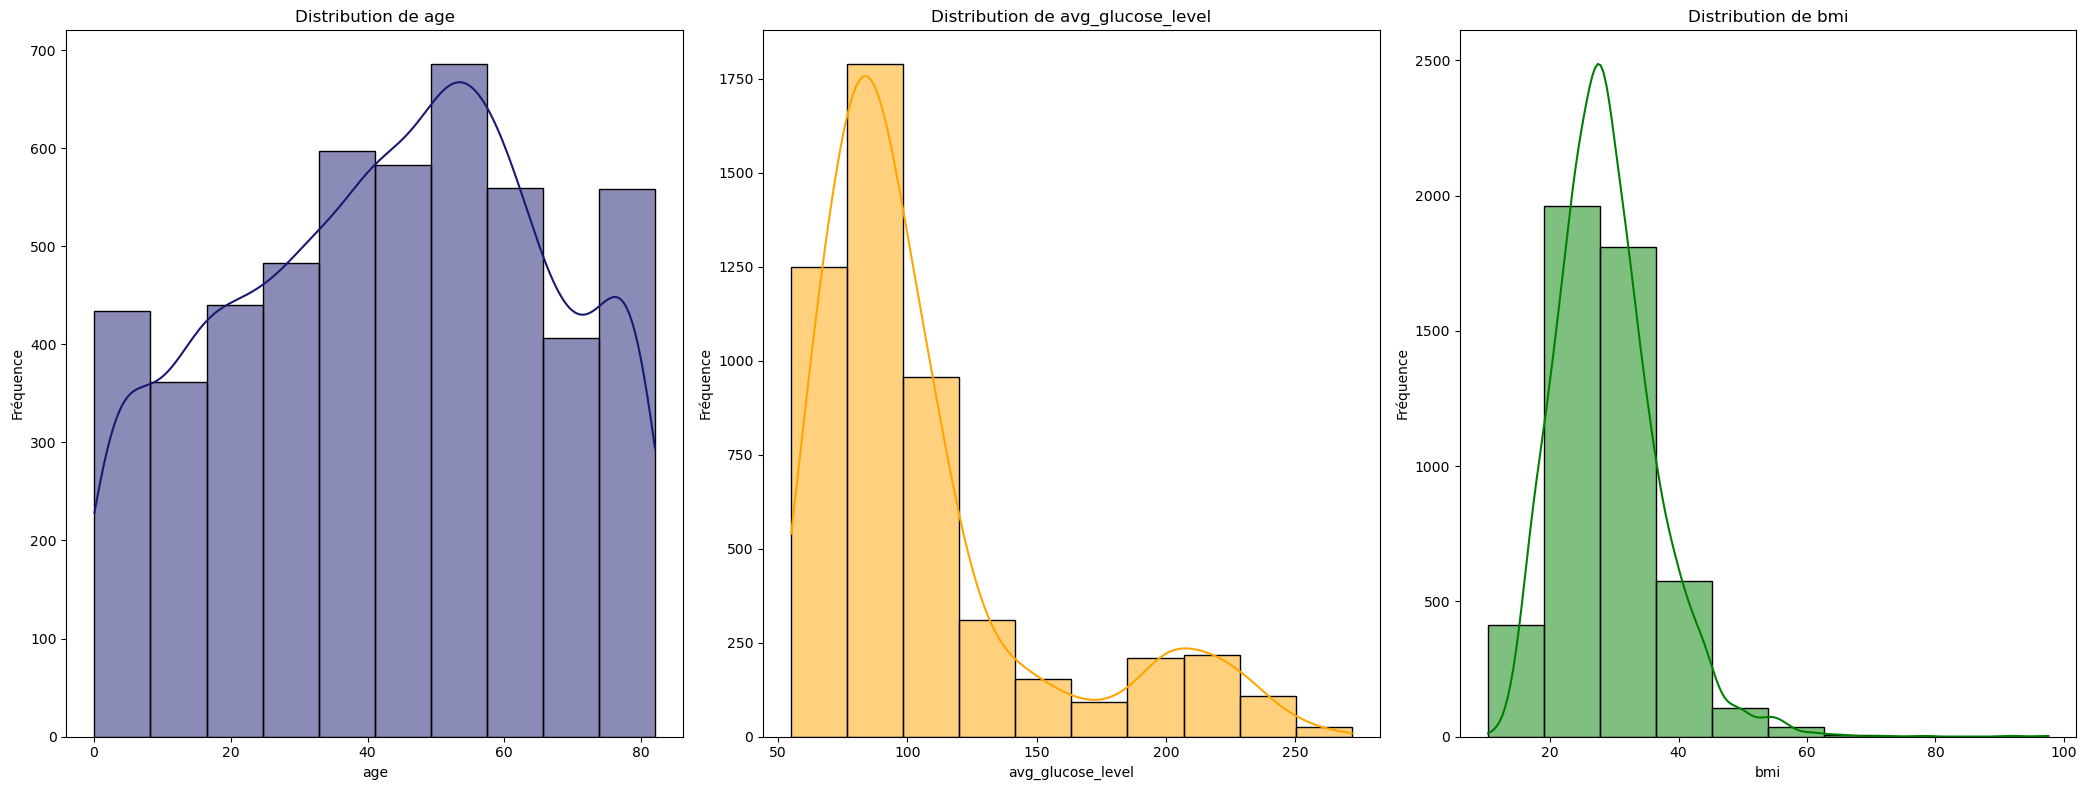

In [12]:
# Ignorer les avertissements de FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Liste des variables quantitatives
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(1, len(variables_quantitatives), figsize=(21, 8))

# Boucle pour générer les graphiques pour chaque variable + histogrammes - KDE
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):
    # Distribution avec Seaborn
    sns.histplot(df[variable], bins=10, color=color, ax=axes[i], edgecolor='black', kde = True)
    axes[i].set_title(f'Distribution de {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Fréquence')

    # Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])
    
plt.tight_layout()
plt.show()

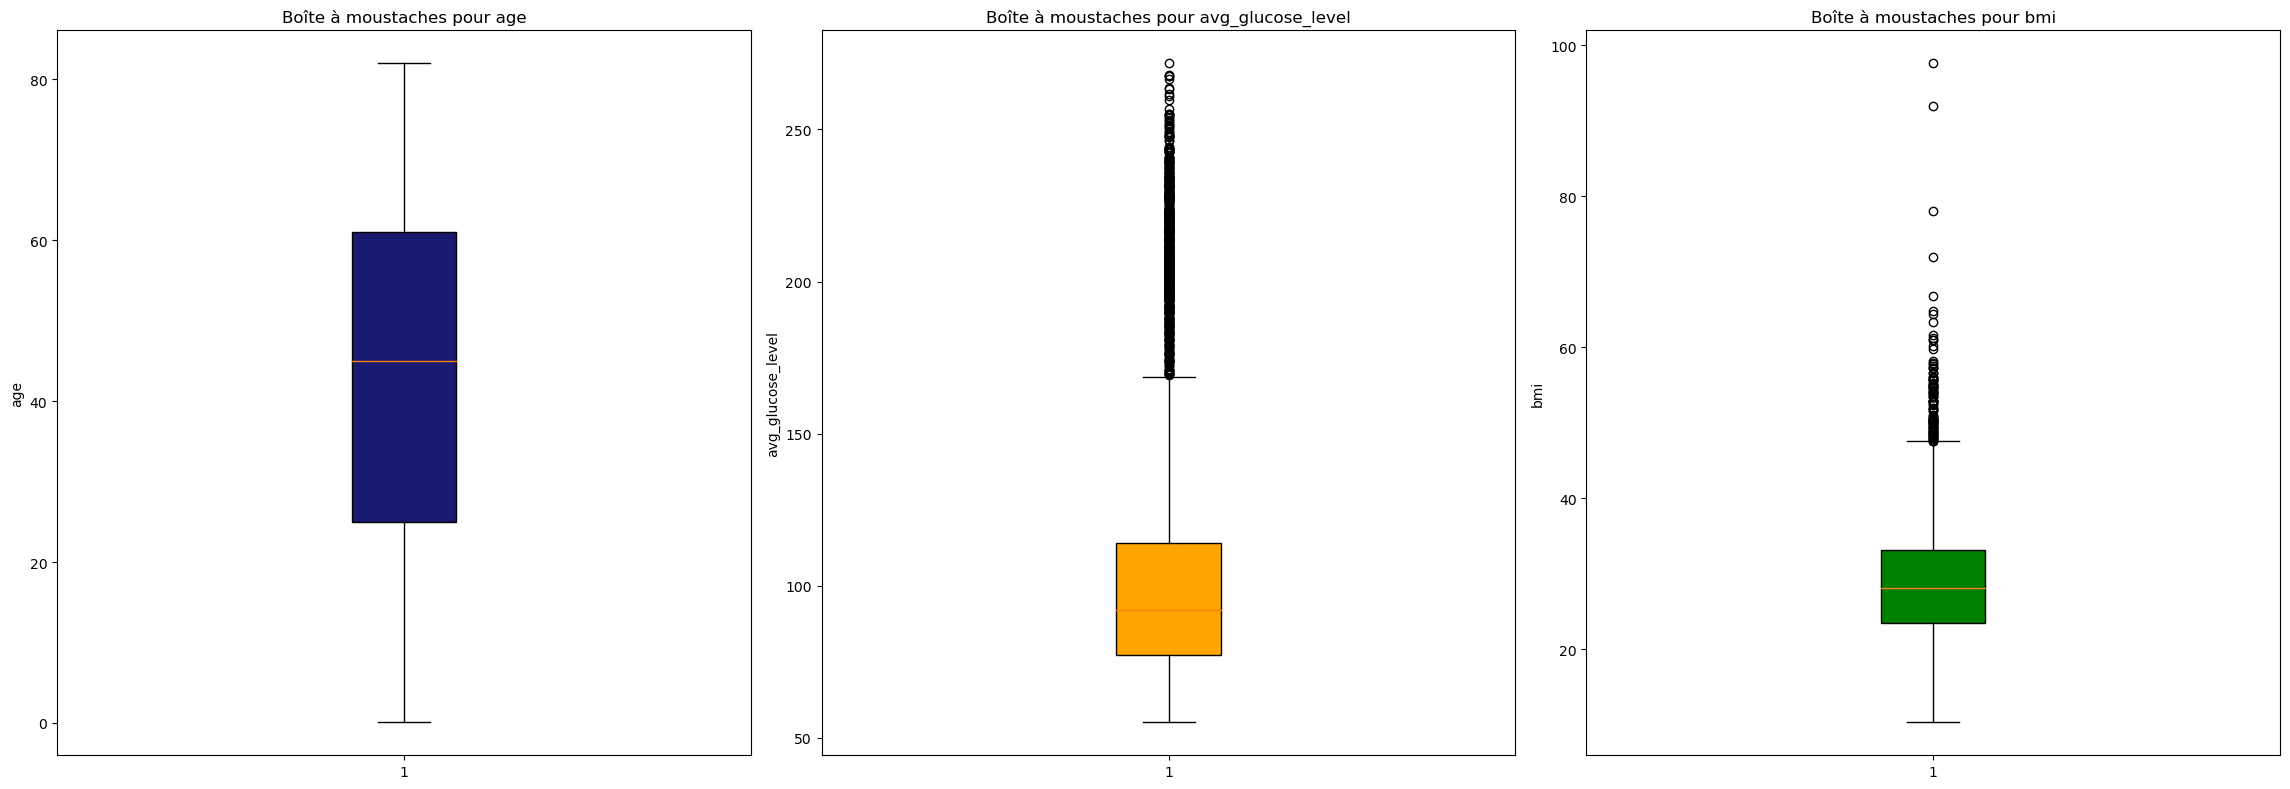

In [13]:
# Liste des variables quantitatives (Graph à moustaches)
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(1, len(variables_quantitatives), figsize=(23, 8))

# Boucle pour générer les graphiques pour chaque variable + boîtes à moustaches
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):
    # Boîte à moustaches
    if variable == 'bmi':
        indice_masse_corporelle = df[variable].dropna()
        axes[i].boxplot(indice_masse_corporelle, showfliers=True, patch_artist=True, boxprops=dict(facecolor=color))
    else:
        axes[i].boxplot(df[variable], patch_artist=True, boxprops=dict(facecolor=color))
    axes[i].set_title(f'Boîte à moustaches pour {variable}')
    axes[i].set_ylabel(variable)

# Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])

plt.tight_layout()
plt.show()


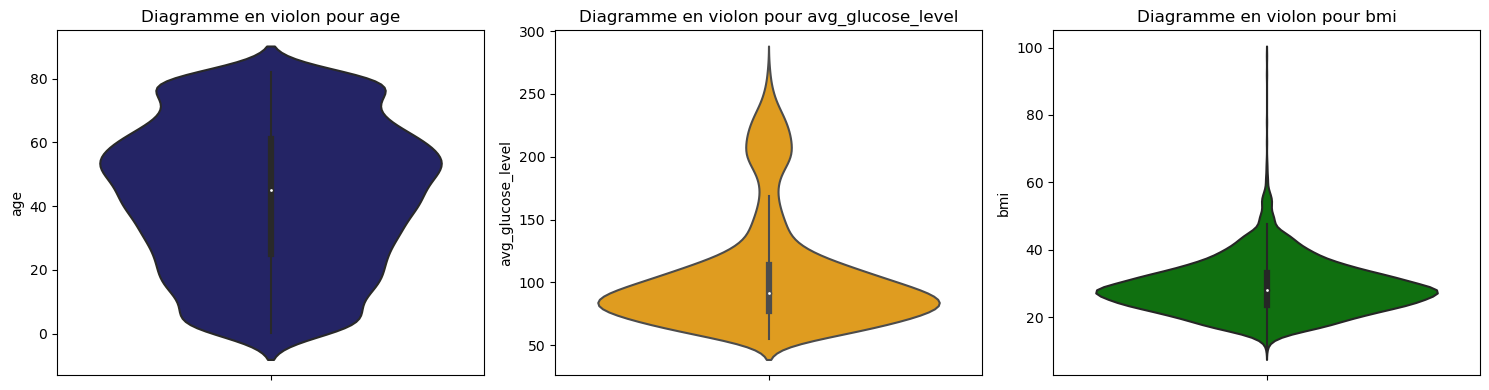

In [14]:
# Liste des variables quantitatives
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(1, len(variables_quantitatives), figsize=(15, 4))

# Boucle pour générer les diagrammes en violon pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):
    # Diagramme en violon
    sns.violinplot(data=df, y=variable, ax=axes[i], color=color)
    axes[i].set_title(f'Diagramme en violon pour {variable}')
    axes[i].set_ylabel(variable)

plt.tight_layout()
plt.show()

# Analyse univariée pour les variables qualitatives 

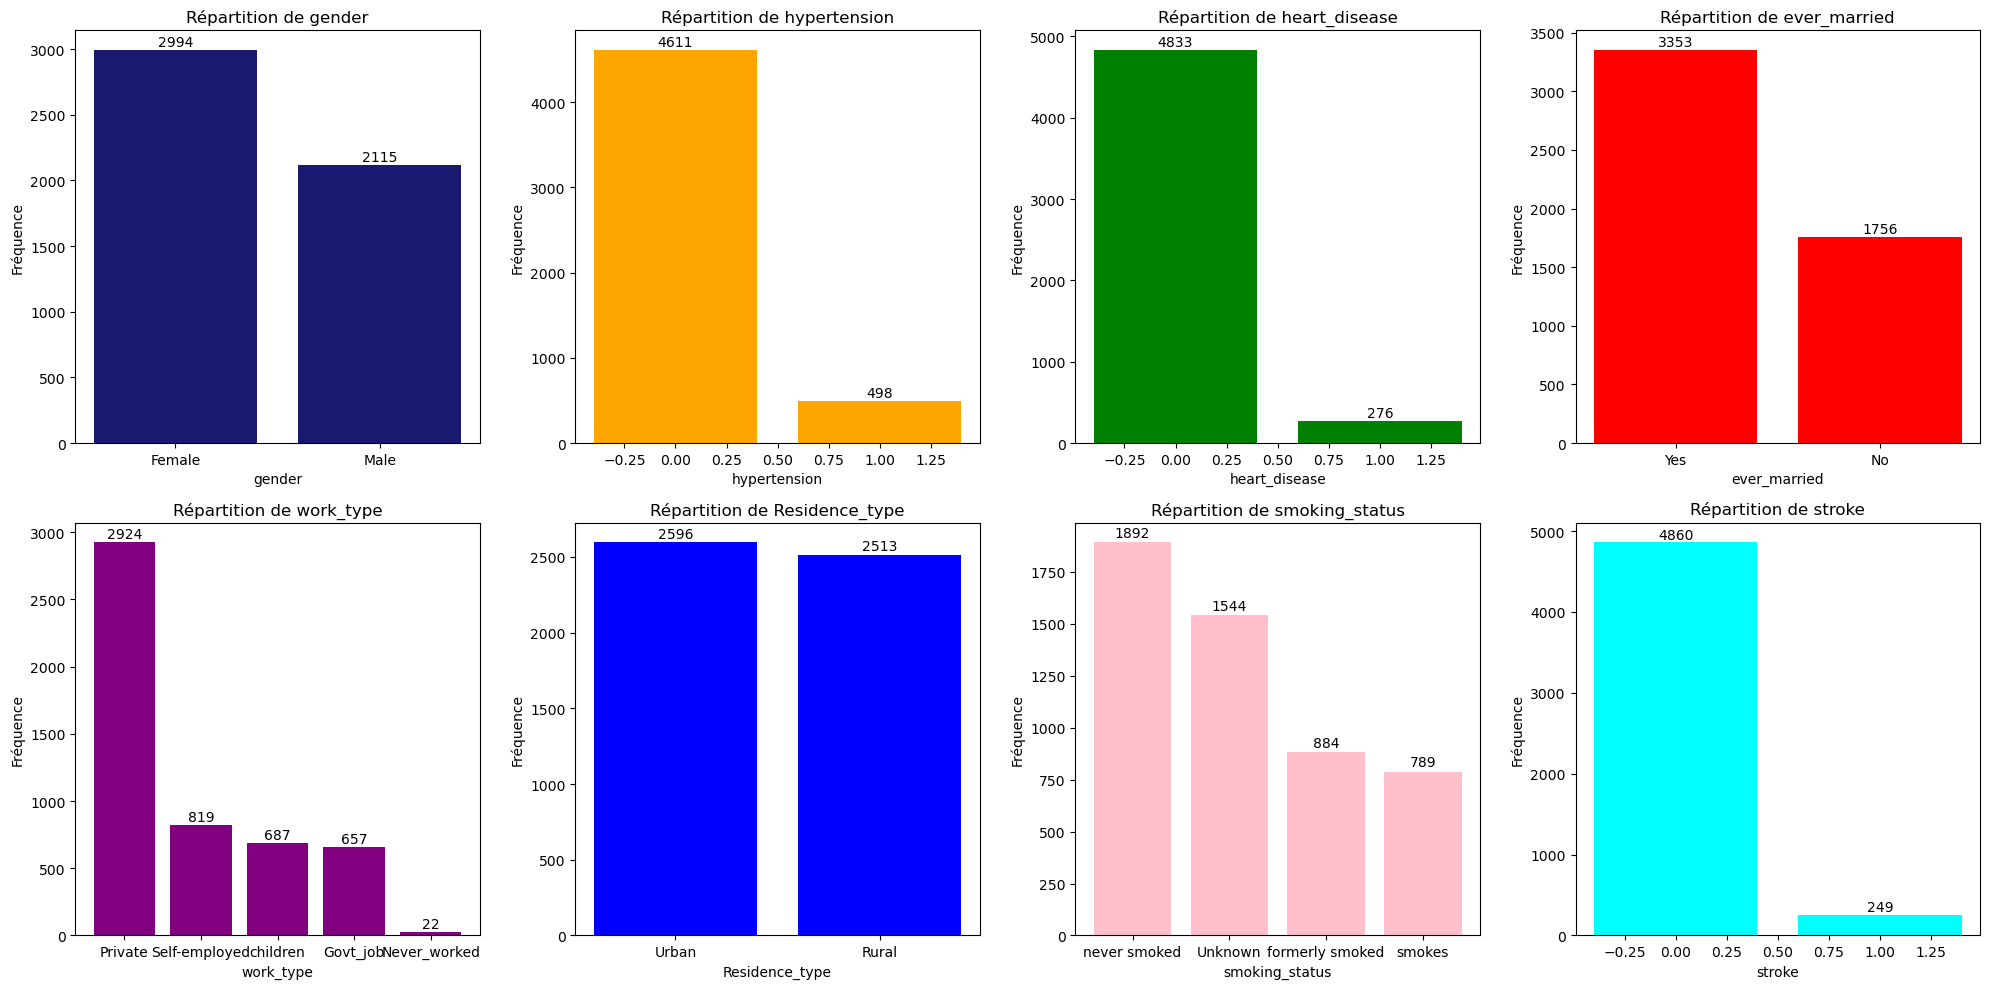

In [15]:
variables_qualitatives = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
colors = ['midnightblue', 'orange', 'green', 'red', 'purple', 'blue', 'pink', 'cyan']

# Calcul du nombre de graphiques sur chaque rangée
num_total_variables = len(variables_qualitatives)
num_graphs_per_row = 4  # Quatre graphiques par ligne
num_rows = (num_total_variables + num_graphs_per_row - 1) // num_graphs_per_row

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_graphs_per_row, figsize=(20, num_rows*5))

# Boucle pour générer les graphiques pour chaque variable qualitative + diagrammes en barres
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors)):
    # Compter les occurrences de chaque catégorie
    counts = df[variable].value_counts()

    # Identifier les sous-graphiques
    row = i // num_graphs_per_row
    col = i % num_graphs_per_row

    # Diagramme en barres
    ax = axes[row, col]
    ax.bar(counts.index, counts.values, color=color)
    ax.set_title(f'Répartition de {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Fréquence')

    # Ajout des valeurs au-dessus des barres
    for j, count in enumerate(counts.values):
        ax.text(j, count + 10, str(count), ha='center', va='bottom')

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(hspace=0.7, wspace=0.5)

plt.tight_layout()
plt.show()

In [16]:
df_patient_avc = df.loc[df['stroke'] == 1,:]
df_patient_avc.shape

(249, 12)

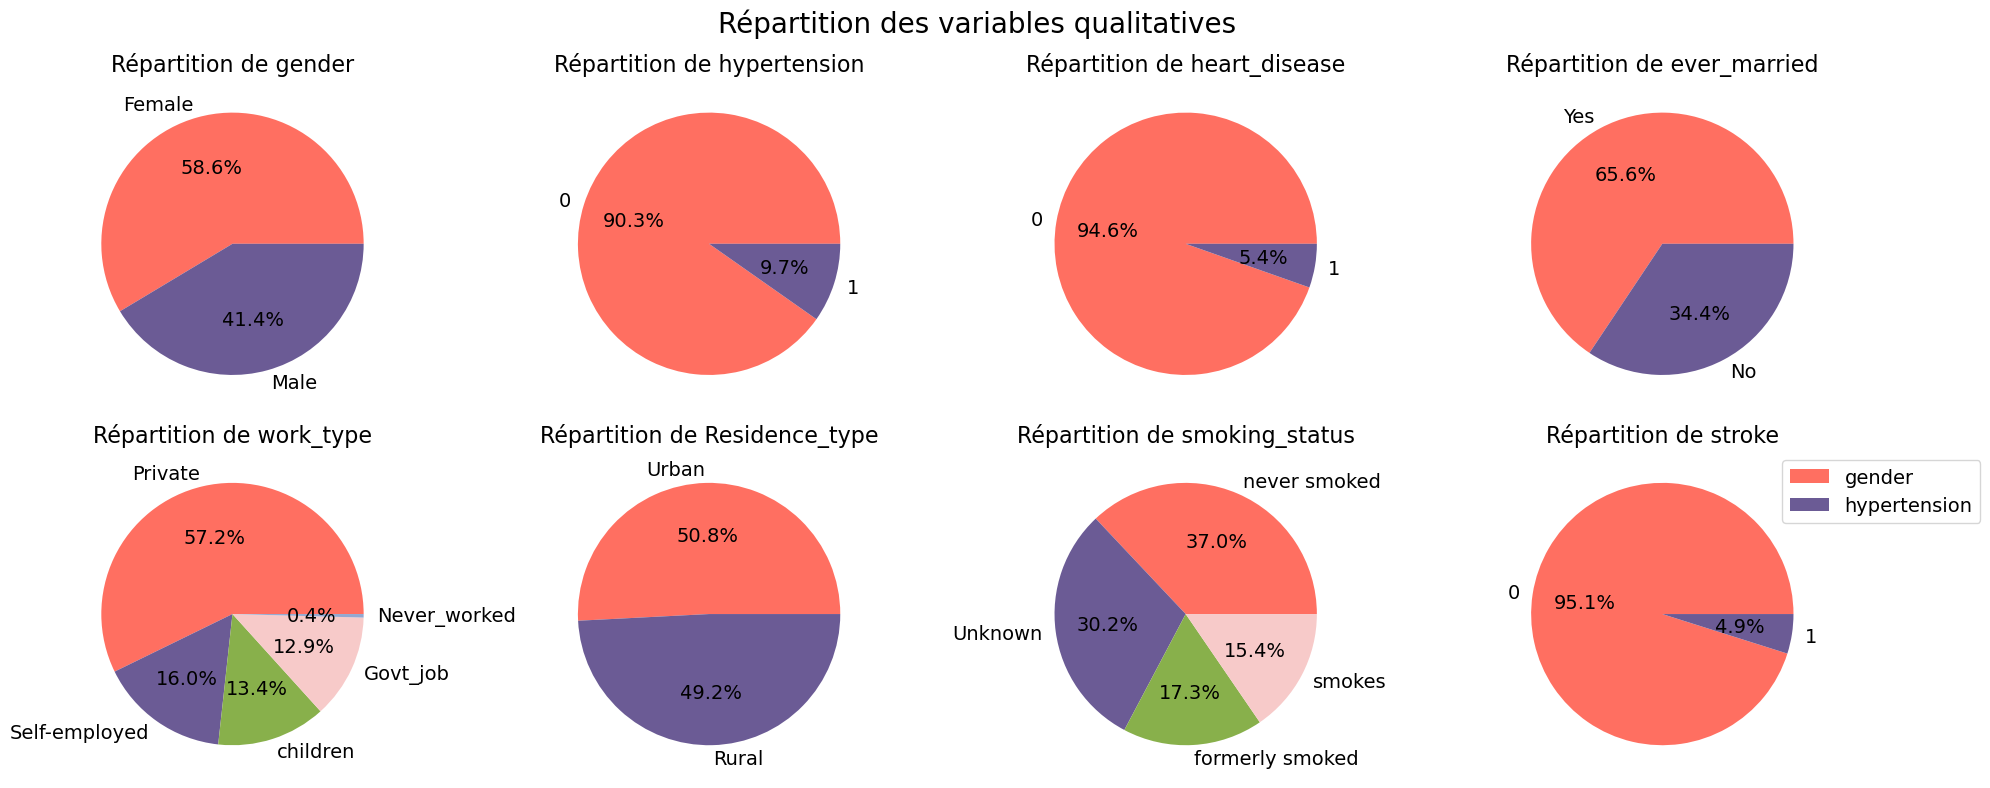

In [17]:
# Liste des variables qualitatives
variables_qualitatives = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7', '#009B77']

# Calcul du nombre de graphiques sur chaque rangée
num_total_variables = len(variables_qualitatives)
num_graphs_per_row = 4  # Quatre graphiques par ligne
num_rows = (num_total_variables + num_graphs_per_row - 1) // num_graphs_per_row

# Définir la taille de la figure
figsize_width = 20  # Largeur de la figure
figsize_height = num_rows * 4  # Hauteur de la figure, ajustée en fonction du nombre de lignes

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_graphs_per_row, figsize=(figsize_width, figsize_height))

# Boucle pour générer les graphiques pour chaque variable qualitative + diagrammes en camembert
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors)):
    # Comptage des occurrences de chaque catégorie
    counts = df[variable].value_counts()
    row = i // num_graphs_per_row
    col = i % num_graphs_per_row

    # Diagramme en camembert
    ax = axes[row, col]
    ax.pie(counts, labels=counts.index, colors=colors[:len(counts)], autopct='%1.1f%%', textprops={'fontsize': 14})
    ax.set_title(f'Répartition de {variable}', fontsize=16)
    ax.set_ylabel('', fontsize=14)

# Ajouter et changer la taille de la police de la légende
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), labels=variables_qualitatives, prop={'size': 14})

# Agrandir la police du titre de la figure
plt.suptitle('Répartition des variables qualitatives', fontsize=20)
plt.tight_layout()
plt.show()

In [18]:
# Supprimer les lignes avec des valeurs manquantes dans la colonne BMI
df_cleaned = df.dropna(subset=['bmi'])
df_cleaned.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Analyses bivariées pour les variables quantitatives avec les trois methodes : Pearson, Spearman, Kendall

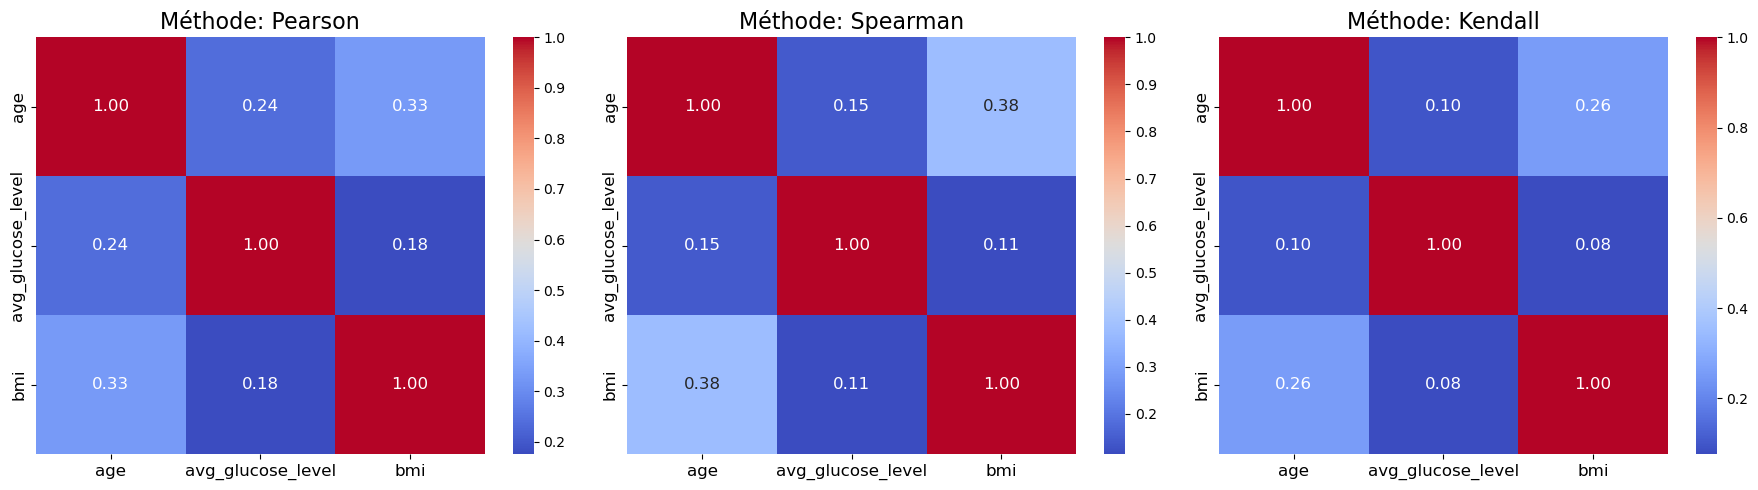

In [19]:
quantitative_columns = ['age', 'avg_glucose_level', 'bmi']

# Liste des méthodes de corrélation
methods = ['pearson', 'spearman', 'kendall']

# Créeation d'une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(1, len(methods), figsize=(18, 5))

# Boucle sur les méthodes de corrélation et génération des graphiques
for i, method in enumerate(methods):
    # Calcule de la matrice de corrélation avec la méthode spécifiée
    correlation_matrix = df[quantitative_columns].corr(method=method)
    
    # Création de la heatmap pour la matrice de corrélation
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12}, ax=axes[i])
    heatmap.set_title(f'Méthode: {method.capitalize()}', fontsize=16)
    
    # Réduction de la taille des noms des colonnes sur les axes x et y
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12)
plt.tight_layout()
plt.show()

 Calcul de la corrélation bivariable de nos variables quantitatives avec la méthode "pointbiserialr" et suppression des lignes avec des valeurs NaN dans les colonnées utilisées pour le calcul

Corrélation bisériale entre Age et Stroke : 0.23, p-value : 0.0000
Corrélation bisériale entre Avg_glucose_level et Stroke : 0.14, p-value : 0.0000
Corrélation bisériale entre Bmi et Stroke : 0.04, p-value : 0.0030


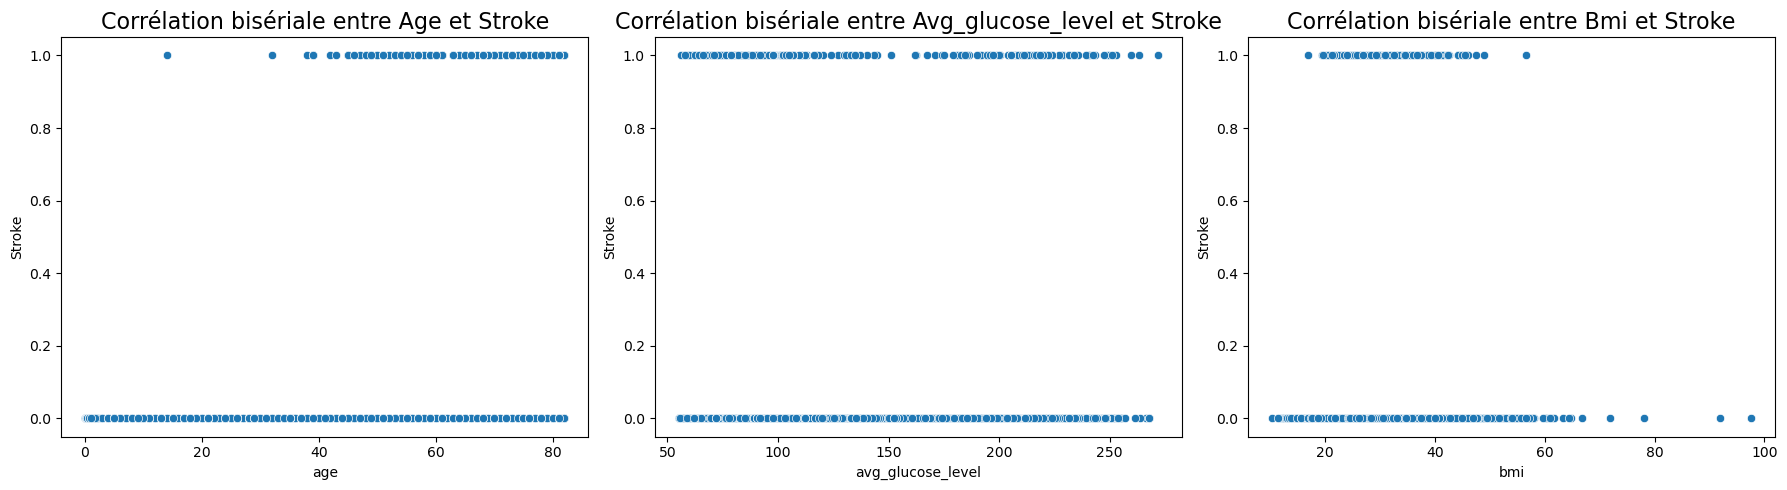

In [20]:
# Suppression des lignes contenant des valeurs NaN dans les colonnes utilisées pour le calcul de la corrélation
df_cleaned = df.dropna(subset=['stroke', 'age', 'avg_glucose_level', 'bmi'])

# Sélectionnez les colonnes quantitatives pour la corrélation avec stroke
quantitative_columns = ['age', 'avg_glucose_level', 'bmi']

# Création d'une figure avec une seule rangée et trois colonnes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tracé des graphiques pour chaque variable quantitative
for i, column in enumerate(quantitative_columns):
    # Calcul de la corrélation bisériale entre la variable quantitative et stroke
    correlation_coefficient, p_value = pointbiserialr(df_cleaned['stroke'], df_cleaned[column])
    
    # Affichage du coefficient de corrélation et de la valeur p
    print(f"Corrélation bisériale entre {column.capitalize()} et Stroke : {correlation_coefficient:.2f}, p-value : {p_value:.4f}")
    
    # Tracé du scatter plot avec la variable quantitative et la variable binaire (stroke)
    sns.scatterplot(data=df_cleaned, x=column, y='stroke', ax=axes[i])
    axes[i].set_title(f'Corrélation bisériale entre {column.capitalize()} et Stroke', fontsize=16)
    axes[i].set_ylabel('Stroke')
    axes[i].set_xlabel(column)

# Ajustement automatique des espaces entre les sous-graphiques
plt.tight_layout()
plt.show()

Nous remarquons une petite corrélation entre l'attribut 'Age' et 'bmi', afin de mieux visualiser le type de relation entre ces deux attributs, nous allons afficher le graphe suivant:

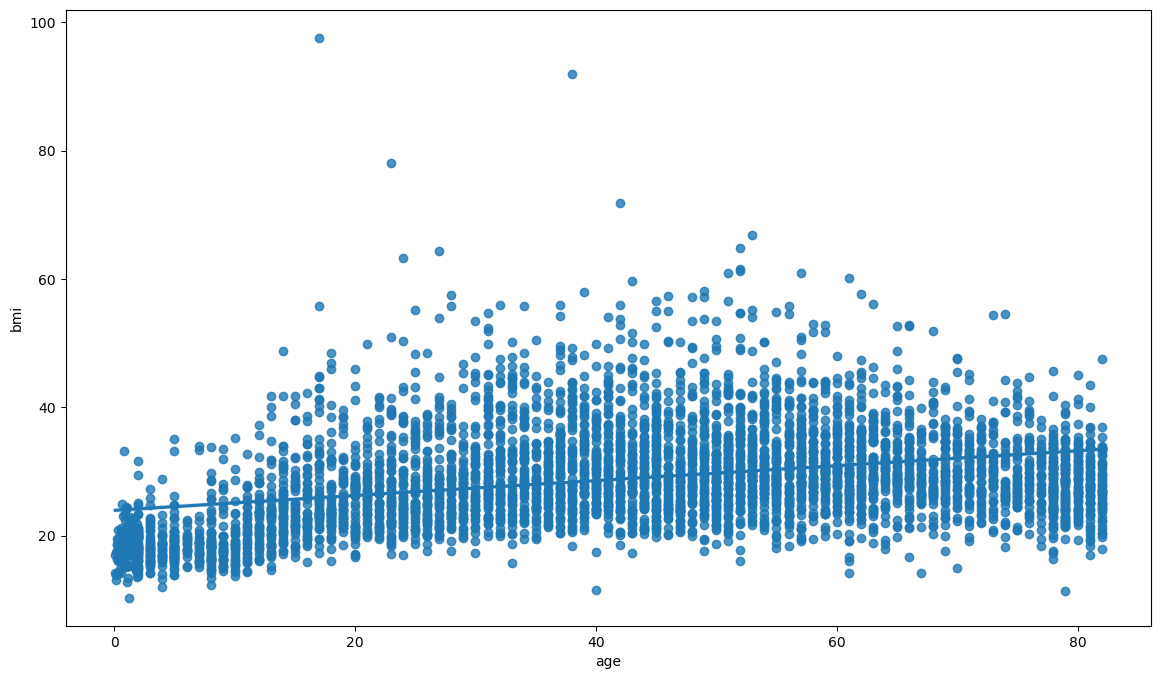

In [21]:
plt.figure(figsize=(14, 8))
sns.regplot(x = "age", y = "bmi", data = df)
plt.show()

Nous remarquons que l'âge augmente, ainsi que l'indice de masse corporelle

Iterpretation de la correlation concernant les variables quantitatives:
Corrélation AGE et AVC :

- Plus la valeur de la corrélation est proche de 1 plus les patients âgés ont tendance à avoir un risque plus élevé d'AVC
- La corrélation négative forte(-1, ou proche de -1) indique que les jeunes dans notre cas ont moins de chances d'avoir un AVC.
- La corrélation proche de 0 indique une faible correlation entre l'AGE et l'AVC

Corrélation entre le niveau moyen de glucose et l'AVC :

- La corrélation positive forte montre que les niveaux plus élevés de glucose moyen sont associés à un risque plus élevé d'AVC
- Une corrélation négative forte indique le contraire, soit que des niveaux plus faibles de glucose moyen sont associés à un risque plus élevé d'AVC.
- Une corrélation proche de zéro indique une faible corrélation entre le niveau moyen de glucose et l'AVC.

Corrélation entre le BMI (Indice de masse corporelle) et l'AVC :

- Une corrélation positive forte indique que des valeurs plus élevées de BMI sont associées à un risque plus élevé d'AVC.
- Une corrélation négative forte indique le contraire, soit que des valeurs plus faibles de BMI sont associées à un risque plus élevé d'AVC.
- Enfin, une corrélation proche de zéro indique une faible corrélation entre le BMI et l'AVC.

Pour résumé notre analyse concernant les variables quantitatives, nous vouvons dire qu'un coefficient de corrélation proche de 1 indique une corrélation positive forte, un coefficient proche de -1 indique une corrélation négative forte, et un coefficient proche de zéro indique une faible corrélation. 
Il est important de tenir compte du fait que la corrélation ne signifie pas nécessairement une relation de causalité.

#  Analyses bivariées pour les variables qualitatives avec la méthode test du Chi-deux

La methode **Chi-deux** est utilisé pour garder l'independance des variables entre elles.
- Si la valeur p est inférieure à un seuil prédéfini (généralement 0,05), on rejette l'hypothèse nulle et on conclut qu'il y a une association significative entre les variables catégorielles. 
- Sinon, on ne rejette pas l'hypothèse nulle et on conclut qu'il n'y a pas suffisamment de preuves pour affirmer une relation entre les variables.

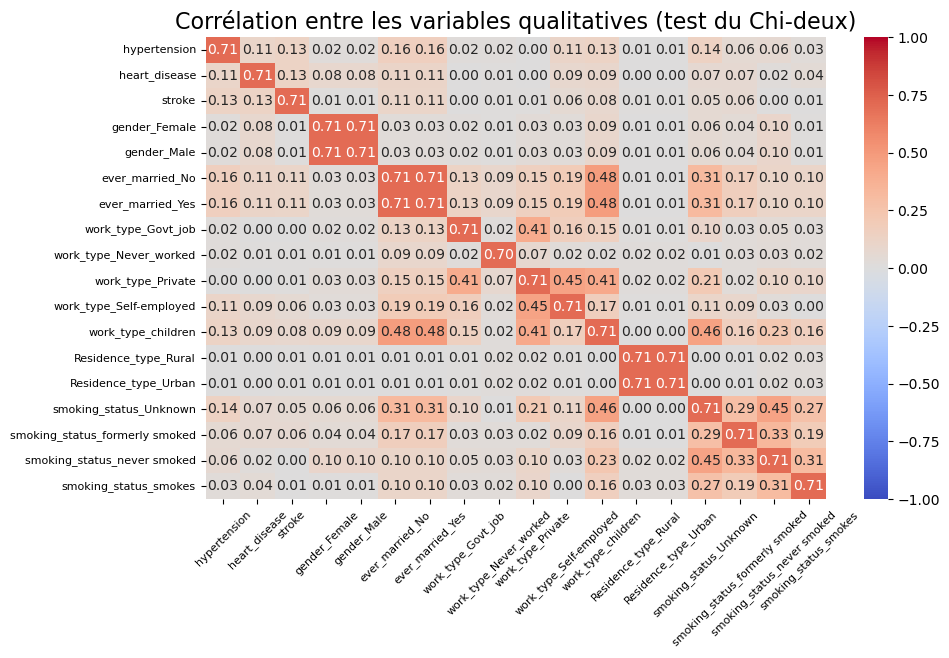

In [22]:
from scipy.stats import chi2_contingency

# Sélection des colonnes qualitatives pour le calcul de la corrélation
variables_qualitatives = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
correlation_df = df[variables_qualitatives]

# Convertir les variables qualitatives en variables indicatrices (dummy variables)
correlation_df = pd.get_dummies(correlation_df)

# Calcul de la matrice de corrélation en utilisant le test du Chi-deux
corr_matrix = pd.DataFrame(index=correlation_df.columns, columns=correlation_df.columns)

for var1 in correlation_df.columns:
    for var2 in correlation_df.columns:
        chi2, p, _, _ = chi2_contingency(pd.crosstab(correlation_df[var1], correlation_df[var2]))
        corr_matrix.loc[var1, var2] = np.sqrt(chi2 / (chi2 + len(df)))

# Tracé du heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10},vmin=-1, vmax=1)
plt.title('Corrélation entre les variables qualitatives (test du Chi-deux)', fontsize=16)

# Réduire la taille des noms des colonnes sur les axes x et y
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)
plt.show()


# Comparaison de l'âge moyen des patients ayant eu un AVC avec ceux qui n'en ont pas eu avec test T

In [23]:
from scipy import stats
# Séparer les données en deux groupes : patients avec AVC et patients sans AVC
avc_group = df[df['stroke'] == 1]['age']
no_avc_group = df[df['stroke'] == 0]['age']

# Calcul de l'âge moyen pour chaque groupe
avc_mean_age = avc_group.mean()
no_avc_mean_age = no_avc_group.mean()

# Effectuer un test t pour évaluer s'il existe une différence significative entre les deux groupes
t_statistic, p_value = stats.ttest_ind(avc_group, no_avc_group)

# Afficher les résultats
print(f"Âge moyen des patients ayant eu un AVC : {avc_mean_age:.2f} ans")
print(f"Âge moyen des patients n'ayant pas eu d'AVC : {no_avc_mean_age:.2f} ans")
print(f"\nTest t-statistique : {t_statistic:.2f}")
print(f"Valeur de p : {p_value:.4f}")

# Interprétation
if p_value < 0.05:
    print("\nIl existe une différence significative dans l'âge moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")
else:
    print("\nIl n'existe pas de différence significative dans l'âge moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")


Âge moyen des patients ayant eu un AVC : 67.73 ans
Âge moyen des patients n'ayant pas eu d'AVC : 41.97 ans

Test t-statistique : 18.08
Valeur de p : 0.0000

Il existe une différence significative dans l'âge moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.


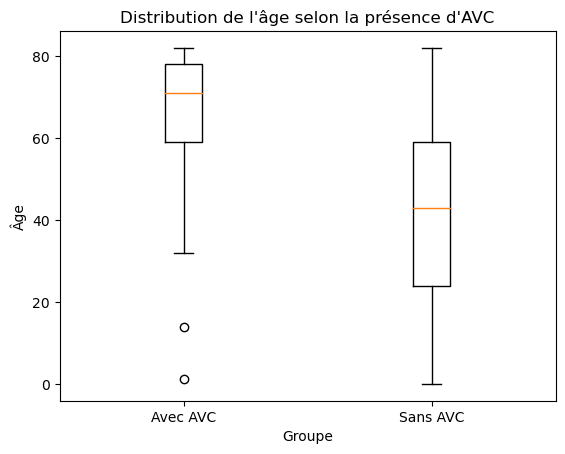

In [24]:
# Données à représenter
data = [avc_group, no_avc_group]
# Création du graphique en boîte
plt.boxplot(data, labels=['Avec AVC', 'Sans AVC'])

plt.xlabel('Groupe')
plt.ylabel('Âge')
plt.title('Distribution de l\'âge selon la présence d\'AVC')
plt.show()

# Comparaison des patients fumeurs et non fumeurs ayant eu un AVC avec ceux qui n'en ont pas eu avec test T

In [25]:
from scipy import stats

# Séparer les données en deux groupes : patients fumeurs et patients non fumeurs
smoker_group = df[df['smoking_status'] == 'smokes']['age']
non_smoker_group = df[df['smoking_status'] == 'never smoked']['age']

# Calcul de l'âge moyen pour chaque groupe
smoker_mean_age = smoker_group.mean()
non_smoker_mean_age = non_smoker_group.mean()

# Effectuer un test t pour évaluer s'il existe une différence significative entre les deux groupes
t_statistic, p_value = stats.ttest_ind(smoker_group, non_smoker_group)

# Afficher les résultats
print(f"Âge moyen des patients fumeurs : {smoker_mean_age:.2f} ans")
print(f"Âge moyen des patients non fumeurs : {non_smoker_mean_age:.2f} ans")
print(f"\nTest t-statistique : {t_statistic:.2f}")
print(f"Valeur de p : {p_value:.4f}")

# Interprétation
if p_value < 0.05:
    print("\nIl existe une différence significative dans l'âge moyen entre les patients fumeurs et non fumeurs.")
else:
    print("\nIl n'existe pas de différence significative dans l'âge moyen entre les patients fumeurs et non fumeurs.")

Âge moyen des patients fumeurs : 47.10 ans
Âge moyen des patients non fumeurs : 46.74 ans

Test t-statistique : 0.44
Valeur de p : 0.6598

Il n'existe pas de différence significative dans l'âge moyen entre les patients fumeurs et non fumeurs.


Au vue des résultats de notre analyse nous pouvons conclure que le fait de fumer ou pas n'implique pas une prédestination à être sujet aux AVC pour les patients

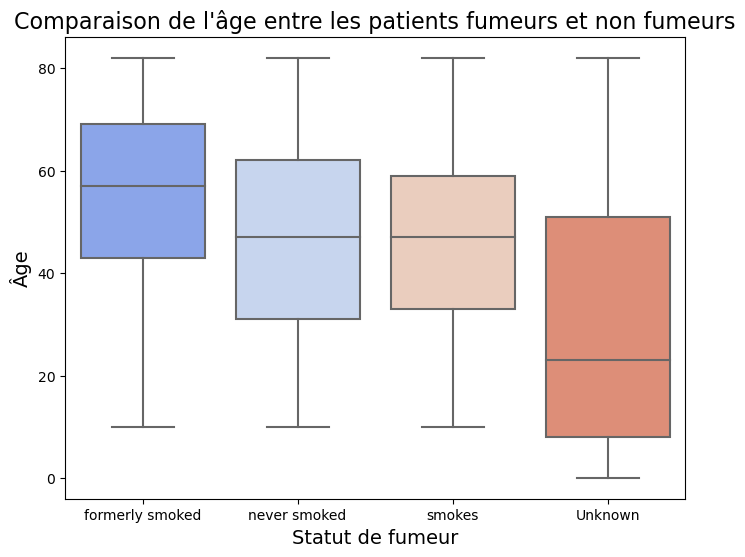

In [26]:
# Création du graphique boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoking_status', y='age', data=df, palette='coolwarm')

# Ajout de titres et d'étiquettes
plt.title("Comparaison de l'âge entre les patients fumeurs et non fumeurs", fontsize=16)
plt.xlabel('Statut de fumeur', fontsize=14)
plt.ylabel('Âge', fontsize=14)
plt.show()

# Calcul de la prévalence (proportion) de l'hypertension et des maladies cardiaques chez les patients ayant et n'ayant pas eu d'AVC.

In [27]:
# Calculer la prévalence de l'hypertension et des maladies cardiaques pour les patients ayant et n'ayant pas eu d'AVC
hypertension_avc = df[df['stroke'] == 1]['hypertension'].mean()
heart_disease_avc = df[df['stroke'] == 1]['heart_disease'].mean()
hypertension_no_avc = df[df['stroke'] == 0]['hypertension'].mean()
heart_disease_no_avc = df[df['stroke'] == 0]['heart_disease'].mean()

# Afficher les résultats
print("Prévalence de l'hypertension et des maladies cardiaques :")
print(f"\n- Chez les patients ayant eu un AVC :")
print(f"  - Hypertension : {hypertension_avc:.2%}")
print(f"  - Maladie cardiaque : {heart_disease_avc:.2%}")
print(f"\n- Chez les patients n'ayant pas eu d'AVC :")
print(f"  - Hypertension : {hypertension_no_avc:.2%}")
print(f"  - Maladie cardiaque : {heart_disease_no_avc:.2%}")

Prévalence de l'hypertension et des maladies cardiaques :

- Chez les patients ayant eu un AVC :
  - Hypertension : 26.51%
  - Maladie cardiaque : 18.88%

- Chez les patients n'ayant pas eu d'AVC :
  - Hypertension : 8.89%
  - Maladie cardiaque : 4.71%


Les résultats obtenus indique une nette difference dans la prévalance de l'hypertension et des maladies cardiaquesentre les patients ayant eu un AVC et ceux qui n'ont pas eu.
- La prévalance de l'hypertension est de 26.51% pour les patients ayant eu un AVC contre seulement 8.89% pour les patients n'ayant pas eu d'AVC
- De même, la prévalance des maladies cardiaques est également plus élevé pour les patients ayant eu un AVC (18.88%) contre (4.71%) par rapport à ceux qui n'ont pas eu.

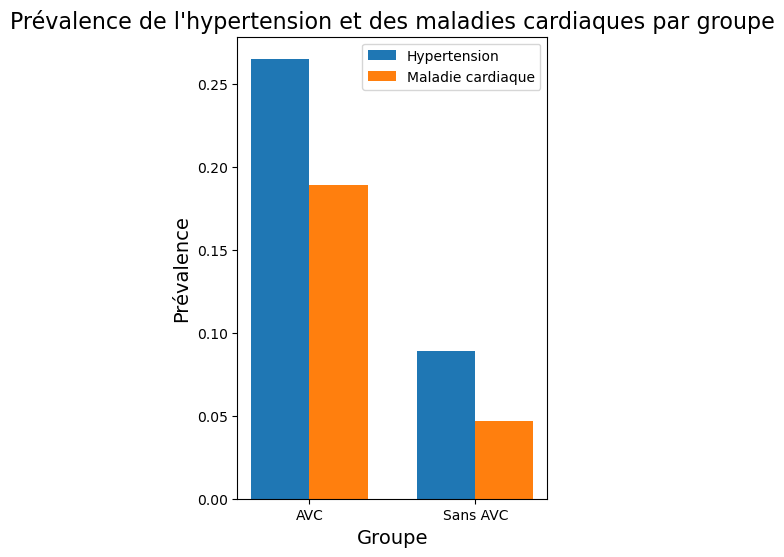

In [28]:
labels = ['AVC', 'Sans AVC']
hypertension_prevalence = [hypertension_avc, hypertension_no_avc]
heart_disease_prevalence = [heart_disease_avc, heart_disease_no_avc]

# Création du graphique
x = range(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(4,6))

# Ajout des barres pour l'hypertension
bar1 = ax.bar(x, hypertension_prevalence, width, label='Hypertension')

# Ajout des barres pour les maladies cardiaques
bar2 = ax.bar([i + width for i in x], heart_disease_prevalence, width, label='Maladie cardiaque')

# Ajout des titres et des étiquettes
ax.set_xlabel('Groupe', fontsize=14)
ax.set_ylabel('Prévalence', fontsize=14)
ax.set_title("Prévalence de l'hypertension et des maladies cardiaques par groupe", fontsize=16)
ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(labels)
ax.legend()
plt.show()

In [29]:
from scipy.stats import f_oneway

# Séparation des données en deux groupes : patients avec AVC et patients sans AVC
avc_group = df[df['stroke'] == 1]['bmi'].dropna()  # Exclure les valeurs NaN
no_avc_group = df[df['stroke'] == 0]['bmi'].dropna()  # Exclure les valeurs NaN

# Effectuer un test ANOVA pour évaluer s'il existe une différence significative entre les deux groupes
f_statistic, p_value = f_oneway(avc_group, no_avc_group)

print(f"Test ANOVA - Valeur F : {f_statistic:.2f}")
print(f"Valeur de p : {p_value:.4f}")

# Interprétation des résultats
alpha = 0.05
if p_value < alpha:
    print("\nIl existe une différence significative dans le BMI moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")
else:
    print("Il n'existe pas de différence significative dans le BMI moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.")

Test ANOVA - Valeur F : 8.81
Valeur de p : 0.0030

Il existe une différence significative dans le BMI moyen entre les patients ayant eu un AVC et ceux qui n'en ont pas eu.


In [30]:
# Supprimer les lignes contenant des valeurs NaN
df_cleaned = df.dropna()

# Vérifier la forme du DataFrame après la suppression des valeurs NaN
print("La forme du DataFrame après avoir supprimé les valeurs NaN:", df_cleaned.shape)
df.head()

La forme du DataFrame après avoir supprimé les valeurs NaN: (4908, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Après avoir supprimé les valeurs NaN nous avons crée la méthode test du chi-carré pour observer les associations significatives entre les variables 

In [31]:
from scipy.stats import chi2_contingency

# Utilisez la boucle pour effectuer le test du chi-carré entre toutes les paires de variables
for var1 in df.columns:
    for var2 in df.columns:
        if var1 != var2:  # Pour éviter de comparer une variable avec elle-même
            contingency_table = pd.crosstab(df[var1], df[var2])
            chi2, p_value, _, _ = chi2_contingency(contingency_table)
            print(f"Test du chi-carré entre {var1} et {var2}:")
            print(f"Statistique du chi-carré: {chi2}")
            print(f"Valeur de p: {p_value}")
            if p_value < 0.05:   # Test de signification à un seuil de 5%
                print("Il existe une association significative entre les deux variables.")
            else:
                print("Il n'y a pas suffisamment de preuves pour conclure à une association significative.")
            print()

Test du chi-carré entre id et gender:
Statistique du chi-carré: 5109.000000000001
Valeur de p: 0.4934222025722661
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre id et age:
Statistique du chi-carré: 526227.0
Valeur de p: 0.45975394744953124
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre id et hypertension:
Statistique du chi-carré: 5109.0
Valeur de p: 0.4934222025722697
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre id et heart_disease:
Statistique du chi-carré: 5109.0
Valeur de p: 0.4934222025722697
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre id et ever_married:
Statistique du chi-carré: 5108.999999999999
Valeur de p: 0.4934222025722733
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré e

Test du chi-carré entre ever_married et id:
Statistique du chi-carré: 5109.0
Valeur de p: 0.4934222025722697
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre ever_married et gender:
Statistique du chi-carré: 4.522661198472508
Valeur de p: 0.03344876472822514
Il existe une association significative entre les deux variables.

Test du chi-carré entre ever_married et age:
Statistique du chi-carré: 3128.6949444916822
Valeur de p: 0.0
Il existe une association significative entre les deux variables.

Test du chi-carré entre ever_married et hypertension:
Statistique du chi-carré: 136.56155936835557
Valeur de p: 1.5037858711857736e-31
Il existe une association significative entre les deux variables.

Test du chi-carré entre ever_married et heart_disease:
Statistique du chi-carré: 66.03593133085836
Valeur de p: 4.427770773371616e-16
Il existe une association significative entre les deux variables.

Test du chi-carré entre ever_married 

Test du chi-carré entre avg_glucose_level et smoking_status:
Statistique du chi-carré: 12007.416362866708
Valeur de p: 0.3092592781308917
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre avg_glucose_level et stroke:
Statistique du chi-carré: 4170.735151717982
Valeur de p: 0.01595961498709968
Il existe une association significative entre les deux variables.

Test du chi-carré entre bmi et id:
Statistique du chi-carré: 2046635.9999999974
Valeur de p: 0.4182207463813895
Il n'y a pas suffisamment de preuves pour conclure à une association significative.

Test du chi-carré entre bmi et gender:
Statistique du chi-carré: 514.4196781837244
Valeur de p: 0.0007775634181102452
Il existe une association significative entre les deux variables.

Test du chi-carré entre bmi et age:
Statistique du chi-carré: 53158.28227028199
Valeur de p: 1.4335284859669295e-230
Il existe une association significative entre les deux variables.

Test du chi-ca

Il semble qu'il existe des associations significatives entre plusieurs paires de variables dans nos données. Ces associations sont déterminées par le test du chi-carré, qui mesurent si les distributions observées des catégories dans les variables sont significativement différentes de ce à quoi on s'attendrait.

Par exemple, il existe des associations significatives entre :

- Le genre et l'âge : 
        Cela signifie que la répartition des âges diffère significativement entre les différents genres.
- Le genre et les maladies cardiaques : 
        Cela indique une différence significative dans la prévalence des maladies cardiaques entre les différents genres.
- Le statut matrimonial et l'hypertension : 
        Cela suggère une association significative entre le statut matrimonial et l'hypertension.
- Le type de travail et l'indice de masse corporelle (IMC) : 
        Cela indique une association significative entre le type de travail et l'IMC.
        
Par contre nous avons relevé le fait qu'il n'y a pas suffisamment de preuves pour conclure à une association significative entre d'autres paires de variables, comme le type de travail et la résidence.

# Modèle d'apprentissage automatique 

Il existe plussieurs types de modèle d'apprentissage automatique dont les plus utilisés sont:

- L'apprentissage supervisé, dans ce type d'apprentissage le modèle est entrainé sur un ensemble de données dont les résultats sont connus à l'avance. Le modèle apprend à prédire ces résultats en se basant sur les caractéristiques des données.
- L'apprentissage non supervisé, ce type d'apprentissage il cherche à découvrir des structures intrisèques ou des schémas de données.
- L'apprentissage semi-supervisé, Ce type d'apprentissage il utilise à la fois les données étiquetées et non étiquettées pour l'entrainement.(avantageuse si les données étiquetées sont difficile ou couteuses à obtenir mais que les données non étiquettées sont disponibles)
- L'apprentissage en ligne, ce modèl consiste à mettre à jour un modèle de manière itérative à mesure que de nouvelles données sont disponibles au lieu de réentrainer

# Préparation des données

Id n'est qu'un identifiant individuelle qui ne fournit pas d'information utile dans la prédiction de l'AVC. Nous eliminon donc cette colonne

In [32]:
df.drop(['id'],axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Les valeurs manquantes de l'attribut "bmi" nous allons les remplacer avec la moyenne car ils sont de type numérique

In [33]:
# Calcul de la moyenne
mean_bmi = df['bmi'].mean()
print(mean_bmi)

28.894559902200488


In [34]:
#Affectation de la moyenne calculé aux valeurs manquantes de l'attribut 'bmi'
df = df.fillna(mean_bmi)
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [35]:
# Nous allons arrondir les âges pour ne plus avoir des valeurs float
df['age'] = df['age'].apply(lambda x: round(x))

<Axes: title={'center': 'Count (target)'}, xlabel='work_type'>

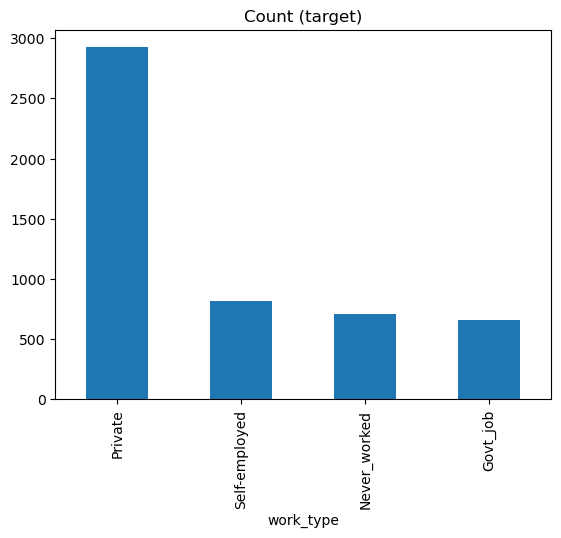

In [36]:
# Nous allons inclure le type de travail 'Children' dasns la classification 'never_worked'.Même si cette classification fait référence à des addusltes qui n'ont jamais travaillé 
#il s'agit des informations qui sont aussi incluses dans la fonction 'âge'ce qui nous permet de les combiner
df.loc[df['work_type'] == 'children','work_type'] = 'Never_worked'
df.work_type.value_counts().plot(kind='bar', title='Count (target)')

Nous avons un grand nombre de personnes dont le status tabagique est inconnu. 
Nous allons modifier une partie de cette valeur en fonction de certains hypothèses réalistes.De cette façon 
nous allons pouvoir classer certains personnes selon leur âge, car il est moins probable que les jeunes fument 

In [37]:
# Verification du nombre de jeunes definis comme 'smodkes' ou 'formerly smoked'
df.loc[(df['age'] < 18) & (df['smoking_status'] == 'smokes'),['age','smoking_status']]

,age,smoking_status
762,17,smokes
1063,13,smokes
1512,12,smokes
2013,10,smokes
2181,17,smokes
2950,17,smokes
3496,16,smokes
4391,16,smokes
4793,17,smokes


In [38]:
df.loc[(df['age'] < 18) & (df['smoking_status'] == 'formerly_smoked'),['age','smoking_status']]

,age,smoking_status


Compte tenue qu'il n'y à que 9 personnes de moins de 18 ans qui fument, donc une très petite population par rapport à
l'ensemble de nos données nous allons reclasser les personnes de moins de 16 ans en tant que fumeurs en 'never smoked' 

In [53]:
df.loc[(df['age'] < 16) & (df['smoking_status'] == 'Unknown'),'smoking_status'] = 'never smoked'
df.smoking_status.value_counts()

smoking_status
2    2527
0     909
1     884
3     789
Name: count, dtype: int64

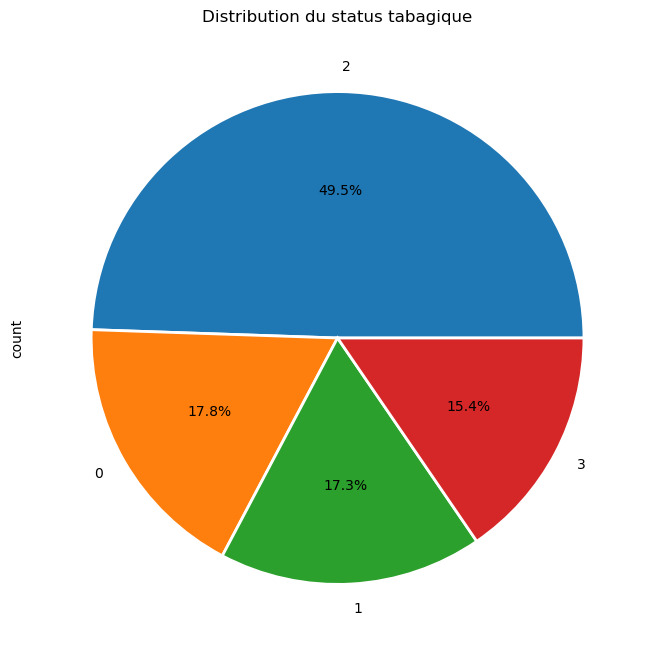

In [54]:
plt.figure(figsize=(12,8))
df.smoking_status.value_counts().plot.pie(autopct="%.1f%%", wedgeprops={"linewidth":2,"edgecolor":"white"});
plt.title("Distribution du status tabagique")
plt.show()

Nous pouvons constater que nous avons réduit les inconnues de 1544 à 909. Cela confirme que notre hypothèse était bonne. Cependant le nombre reste élevé et peut affecté la façon dont cette caracthèristique semble liée à l'AVC 

In [61]:
# Encodage des variables catégorielles avec get_dummies() en spécifiant un préfixe pour les nouvelles colonnes
df_encoded = pd.get_dummies(df, prefix=['work_type', 'smoking_status'])
df_encoded

,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,False,True,False,False,False,True
1,False,False,True,False,True,False
2,True,False,False,True,False,False
3,False,True,False,False,True,False


In [66]:
#Conversion des données catégorielle en données numériques
data = {
    'work_type_Govt_job': [False, False, True, False],
    'work_type_Private': [True, False, False, True],
    'work_type_Self-employed': [False, True, False, False],
    'smoking_status_formerly smoked': [False, False, True, False],
    'smoking_status_never smoked': [False, True, False, True],
    'smoking_status_smokes': [True, False, False, False]
}
# Création du DataFrame
df = pd.DataFrame(data)
df = df.astype(int)
df

,work_type_Govt_job,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0,0,1
1,0,0,1,0,1,0
2,1,0,0,1,0,0
3,0,1,0,0,1,0


Nous allons extraire la colonne stroke de notre df et la stocker dans une nouvelle variable appelée 'target' puis nous supprimons la colonne stroke du df. Afin de préparer nos données pour la modélisation prédictive on sépare la variable cible des autres caractéristiques afin de pouvoir entrainer notre modèle de machine learning sur les caractéristiques restantes pour prédir la cible

In [69]:
print("Nombre d'échantillons dans df:", len(df))
print("Nombre d'échantillons dans target:", len(target))

Nombre d'échantillons dans df: 4
Nombre d'échantillons dans target: 5109


In [70]:
# Vérifier les index
print("Index du DataFrame:", df.index)
print("Index de la variable target:", target.index)

# Vérifier les doublons ou des valeurs manquantes
print("Doublons dans le DataFrame:", df.duplicated().sum())
print("Doublons dans la variable target:", target.duplicated().sum())
print("Valeurs manquantes dans le DataFrame:", df.isnull().sum())
print("Valeurs manquantes dans la variable target:", target.isnull().sum())

# Vérifier les valeurs uniques dans la variable target
print("Valeurs uniques dans la variable target:", target.unique())

Index du DataFrame: RangeIndex(start=0, stop=4, step=1)
Index de la variable target: Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109],
      dtype='int64', length=5109)
Doublons dans le DataFrame: 0
Doublons dans la variable target: 5107
Valeurs manquantes dans le DataFrame: work_type_Govt_job                0
work_type_Private                 0
work_type_Self-employed           0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64
Valeurs manquantes dans la variable target: 0
Valeurs uniques dans la variable target: [1 0]


In [71]:
# Réindexer la variable target pour correspondre à l'index du DataFrame
target = target.reset_index(drop=True)

# Vérifier s'il y a des doublons et les supprimer
target = target.drop_duplicates()

# Vérifier si les index correspondent maintenant
print("Index de la variable target après réindexation:", target.index)

Index de la variable target après réindexation: Index([0, 249], dtype='int64')


In [74]:
X = df_encoded  # Les données d'entrée
y = target      # La variable cible

# Vérifier le nombre d'échantillons dans X
nb_samples_X = X.shape[0]

# Vérifier le nombre d'échantillons dans y
nb_samples_y = len(y)

# Comparer les résultats
if nb_samples_X == nb_samples_y:
    print("Le nombre d'échantillons dans X et y est identique.")
else:
    print("Le nombre d'échantillons dans X et y est différent.")


Le nombre d'échantillons dans X et y est différent.


In [77]:
# Vérifier les index de X et y
print("Index de X:", X.index)
print("Index de y:", y.index)

# Réindexer y pour qu'il corresponde à l'index de X si nécessaire
y = y.reindex(X.index)

# Vérifier à nouveau les index pour confirmer qu'ils correspondent maintenant
print("Index de X après réindexation:", X.index)
print("Index de y après réindexation:", y.index)


Index de X: RangeIndex(start=0, stop=4, step=1)
Index de y: RangeIndex(start=0, stop=4, step=1)
Index de X après réindexation: RangeIndex(start=0, stop=4, step=1)
Index de y après réindexation: RangeIndex(start=0, stop=4, step=1)
